<img src='https://res.cloudinary.com/practicaldev/image/fetch/s--0D_ihm0g--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/4hxawn5gsmzyf8omfuxa.png' width=800 align='left'>

_Autor: Evandro Avellar_

# Dia 01 - Importar Dados

Dados de empréstimos dos acervos do sistema de bibliotecas da UFRN. 

In [1]:
import pandas as pd
import os

## Coleta e Organização dos Dados

## Unificar em um único Dataframe todos os dados pertinentes para a análise. 

### Dados de empréstimos

* Listando os arquivos csv de Empréstimos para unificá-los num único DataFrame.

> https://docs.python.org/pt-br/3/library/os.html#os.listdir

In [2]:
arquivos = os.listdir('./Dia_1-Importando_dados/Datasets/dados_emprestimos/')
arquivos

['emprestimos-20101.csv',
 'emprestimos-20102.csv',
 'emprestimos-20111.csv',
 'emprestimos-20112.csv',
 'emprestimos-20121.csv',
 'emprestimos-20122.csv',
 'emprestimos-20131.csv',
 'emprestimos-20132.csv',
 'emprestimos-20141.csv',
 'emprestimos-20142.csv',
 'emprestimos-20151.csv',
 'emprestimos-20152.csv',
 'emprestimos-20161.csv',
 'emprestimos-20162.csv',
 'emprestimos-20171.csv',
 'emprestimos-20172.csv',
 'emprestimos-20181.csv',
 'emprestimos-20182.csv',
 'emprestimos-20191.csv',
 'emprestimos-20192.csv',
 'emprestimos-20201.csv']

Após listar os arquivos a serem importados, eles serão unificados em um único DataFrame através do método ```pd.concat()``` do Pandas.

> https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [3]:
tabela_x = pd.DataFrame()

for arquivo in arquivos:
    tabela_1 = pd.read_csv(f'./Dia_1-Importando_dados/Datasets/dados_emprestimos/{arquivo}')
    tabela_x = pd.concat([tabela_x, tabela_1])    

In [4]:
tabela_x.reset_index(inplace=True)

### Dados do acervo

Para utilização do Pandas na leitura de arquivo .parquet é necessário instalar a biblioteca ___pyarrow___ e o método ___pd.read_parquet()___

https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [5]:
!pip install pyarrow


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
acervo = pd.read_parquet('./Dia_1-Importando_dados/Datasets/dados_exemplares.parquet', engine='pyarrow')
acervo

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15
...,...,...,...,...,...,...,...
568580,1353472,2021011150,Acervo Circulante,Biblioteca Setorial do Núcleo de Educação da I...,REGULAR,951,268231
568581,1353473,2019013454,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,997,268233
568582,1353474,2019012811,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,987,268234


## Identificando dados nulos e vazios

https://pandas.pydata.org/docs/reference/api/pandas.isna.html

https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

In [7]:
# isna
print(tabela_x.isna().sum())

index                         0
id_emprestimo                 0
codigo_barras                 0
data_renovacao          1285720
data_emprestimo               0
data_devolucao             6471
matricula_ou_siape         3170
tipo_vinculo_usuario          0
dtype: int64


In [8]:
# isnull
print(tabela_x.isnull().sum())

index                         0
id_emprestimo                 0
codigo_barras                 0
data_renovacao          1285720
data_emprestimo               0
data_devolucao             6471
matricula_ou_siape         3170
tipo_vinculo_usuario          0
dtype: int64


In [9]:
# isna
print(acervo.isna().sum())

id_exemplar         0
codigo_barras       0
colecao             0
biblioteca          0
status_material     0
localizacao         0
registro_sistema    0
dtype: int64


In [10]:
# isnull
print(acervo.isnull().sum())

id_exemplar         0
codigo_barras       0
colecao             0
biblioteca          0
status_material     0
localizacao         0
registro_sistema    0
dtype: int64


As colunas que apresentam dados nulos não afetarão a junção dos dataframes nesse momento.

## Removendo dados duplicados

Não poderemos trabalhar com registros com dados do código de barras duplicados no acervo pois serão utilizados como chaves para o merge.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html

In [11]:
print(acervo['codigo_barras'].nunique())
print(len(acervo))

545049
546237


Para tabela dos empréstimos não poderão ter registros duplicados com mesmo número na coluna id_emprestimo.

In [12]:
print(tabela_x['id_emprestimo'].nunique())
print(len(tabela_x))

2139267
2258018


Eliminando os registros duplicados com o método ___drop_duplicates___

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [13]:
acervo_df = acervo.drop_duplicates(subset='codigo_barras', keep='first')
emprestimos_df = tabela_x.drop_duplicates(subset='id_emprestimo', keep='first')

In [14]:
print(emprestimos_df['id_emprestimo'].nunique())
print(len(emprestimos_df))

2139267
2139267


In [15]:
print(acervo_df['codigo_barras'].nunique())
print(len(acervo_df))

545049
545049


### Merge entre dos dois DataFrames (Acervo e Empréstimos)

Mesclando com os dados do acervo, para entender, por exemplo, de qual biblioteca era o material emprestado ou a qual tema ele se referia. A relação se dá pela coluna de código de barras de cada material. 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [16]:
df_1 = pd.merge(emprestimos_df, acervo_df, on = "codigo_barras")

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955743 entries, 0 to 1955742
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   index                 int64  
 1   id_emprestimo         int64  
 2   codigo_barras         object 
 3   data_renovacao        object 
 4   data_emprestimo       object 
 5   data_devolucao        object 
 6   matricula_ou_siape    float64
 7   tipo_vinculo_usuario  object 
 8   id_exemplar           int64  
 9   colecao               object 
 10  biblioteca            object 
 11  status_material       object 
 12  localizacao           int64  
 13  registro_sistema      int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 223.8+ MB


In [18]:
# isna
print(df_1.isna().sum())

index                         0
id_emprestimo                 0
codigo_barras                 0
data_renovacao          1096082
data_emprestimo               0
data_devolucao             6138
matricula_ou_siape         2705
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
registro_sistema              0
dtype: int64


In [19]:
# isnull
print(df_1.isnull().sum())

index                         0
id_emprestimo                 0
codigo_barras                 0
data_renovacao          1096082
data_emprestimo               0
data_devolucao             6138
matricula_ou_siape         2705
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
registro_sistema              0
dtype: int64


DataFrame preparado para iniciar as análises

# Dia 02 - Limpeza de Dados

## Criação de coluna de classes do CDU

"Os itens do acervo em uma biblioteca são organizados por um sistema de classificação de acordo com o respectivo tema. Existem diversos sistemas, mas este conjunto está de acordo com a CDU - Classificação Decimal Universal. Esta classificação é decimal, pois varia de acordo com a classe de cada assunto:

*	000 a 099: Generalidades. Ciência e conhecimento.
*	100 a 199: Filosofia e psicologia.
*	200 a 299: Religião.
*	300 a 399: Ciências sociais.
*	400 a 499: Classe vaga. Provisoriamente não ocupada.
*	500 a 599: Matemática e ciências naturais.
*	600 a 699: Ciências aplicadas.
*	700 a 799: Belas artes.
*	800 a 899: Linguagem. Língua. Linguística.
*	900 a 999: Geografia. Biografia. História."


Portanto, se um material tiver um código de localização 720, ele está dentro da classe geral de “Belas Artes”; ou se tiver um código 028, estará dentro da classe geral de “Generalidades. Ciência e conhecimento”.

Para isso, crie uma nova coluna com os valores da localização, para refletir a respectiva classe geral na CDU.

In [20]:
def categorizar(num):
    if num < 100:
        return 'Generalidades. Ciência e conhecimento'
    elif num >= 100 and num < 199: 
        return 'Filosofia e psicologia'
    elif num >= 200 and num < 299:
        return 'Religião'
    elif num >= 300 and num <= 399:
        return 'Ciências sociais'
    elif num >= 400 and num <= 499: 
        return 'Classe vaga. Provisoriamente não ocupada'
    elif num >= 500 and num <= 599: 
        return 'Matemática e ciências naturais'
    elif num >= 600 and num <= 699: 
        return 'Ciências aplicadas.'
    elif num >= 700 and num <= 799: 
        return 'Belas artes'
    elif num >= 800 and num <= 899: 
        return 'Linguagem. Língua. Linguística'
    elif num >= 900 and num <= 999: 
        return 'Geografia. Biografia. História'
    else:
        return "Erro"

In [21]:
df_1['Classe'] = df_1['localizacao'].apply(categorizar)

### Exclusão da coluna "registro_sistema" 

A coluna "registro_sistema" não está fazendo sentido para essa análise, por isso será excluída.

In [22]:
df_1 = df_1[['index', 'id_emprestimo', 'codigo_barras', 'data_renovacao','data_emprestimo', 'data_devolucao', 'matricula_ou_siape',
       'tipo_vinculo_usuario', 'id_exemplar', 'colecao', 'biblioteca','status_material', 'localizacao', 'Classe']]

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955743 entries, 0 to 1955742
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   index                 int64  
 1   id_emprestimo         int64  
 2   codigo_barras         object 
 3   data_renovacao        object 
 4   data_emprestimo       object 
 5   data_devolucao        object 
 6   matricula_ou_siape    float64
 7   tipo_vinculo_usuario  object 
 8   id_exemplar           int64  
 9   colecao               object 
 10  biblioteca            object 
 11  status_material       object 
 12  localizacao           int64  
 13  Classe                object 
dtypes: float64(1), int64(4), object(9)
memory usage: 223.8+ MB


### Transformar a coluna "matricula_ou_siape" no formato String

A coluna da matricula (“matricula_ou_siape”) não está com um formato muito legível. 
Será transformada em formato String. 

In [24]:
df_1['matricula_ou_siape'] = df_1['matricula_ou_siape'].apply(str)

In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955743 entries, 0 to 1955742
Data columns (total 14 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   index                 int64 
 1   id_emprestimo         int64 
 2   codigo_barras         object
 3   data_renovacao        object
 4   data_emprestimo       object
 5   data_devolucao        object
 6   matricula_ou_siape    object
 7   tipo_vinculo_usuario  object
 8   id_exemplar           int64 
 9   colecao               object
 10  biblioteca            object
 11  status_material       object
 12  localizacao           int64 
 13  Classe                object
dtypes: int64(4), object(10)
memory usage: 223.8+ MB


In [26]:
df_1.sort_values('data_emprestimo').tail()

,index,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,Classe
941820,26556,2989086,2008047044,NaN,2020/05/05 19:51:06.059000000,2021/05/13 14:53:31.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,256297,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,684,Ciências aplicadas.
929239,26557,2989087,2008047047,NaN,2020/05/05 19:51:06.135000000,2021/05/13 14:53:38.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,256406,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,628,Ciências aplicadas.
1456933,26558,2989088,2010052905,NaN,2020/05/05 19:51:06.164000000,2021/05/13 15:01:46.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,807821,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,653,Ciências aplicadas.
629939,26559,2989089,2010048023,NaN,2020/06/09 11:54:02.669000000,2021/07/21 15:33:55.000000000,20201014993.0,ALUNO DE PÓS-GRADUAÇÃO,804885,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,675,Ciências aplicadas.
1477200,26560,2989090,2013106838,NaN,2020/06/09 11:54:02.852000000,2021/07/21 15:33:45.000000000,20201014993.0,ALUNO DE PÓS-GRADUAÇÃO,1099777,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,14,Generalidades. Ciência e conhecimento


# Dia 03 - Análise exploratória de dados e DateTime

In [27]:
import matplotlib.pyplot as plt

Objetivo: entender a quantidade e quando se emprestaram os livros.

### Transformar as datas em tipo Datetime

In [28]:
df_1['data_emprestimo'] = pd.to_datetime(df_1['data_emprestimo'])

Verificar qual é a quantidade total de exemplares emprestados por cada ano e plote um gráfico de linhas. Criando uma coluna ano para facilitar a análise.

In [29]:
df_1['data_emprestimo'].dt.year

0          2010
1          2010
2          2010
3          2010
4          2010
           ... 
1955738    2020
1955739    2020
1955740    2020
1955741    2020
1955742    2020
Name: data_emprestimo, Length: 1955743, dtype: int64

In [30]:
df_1['ano_emprestimo'] = df_1['data_emprestimo'].dt.year

## Gráfico e análise de empréstimo por ano

In [31]:
grafico_groupby_ano = df_1.groupby(by=["ano_emprestimo"], dropna=False).count()
grafico_groupby_ano

,index,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,Classe
ano_emprestimo,,,,,,,,,,,,,,
2010,161282,161282,161282,71393,161282,161269,161282,161282,161282,161282,161282,161282,161282,161282
2011,196202,196202,196202,93759,196202,196197,196202,196202,196202,196202,196202,196202,196202,196202
2012,221142,221142,221142,103876,221142,221133,221142,221142,221142,221142,221142,221142,221142,221142
2013,234437,234437,234437,105345,234437,234412,234437,234437,234437,234437,234437,234437,234437,234437
2014,218774,218774,218774,94095,218774,218741,218774,218774,218774,218774,218774,218774,218774,218774
2015,213118,213118,213118,85355,213118,213077,213118,213118,213118,213118,213118,213118,213118,213118
2016,215413,215413,215413,94789,215413,215365,215413,215413,215413,215413,215413,215413,215413,215413
2017,104994,104994,104994,44768,104994,104941,104994,104994,104994,104994,104994,104994,104994,104994
2018,193547,193547,193547,81693,193547,193486,193547,193547,193547,193547,193547,193547,193547,193547


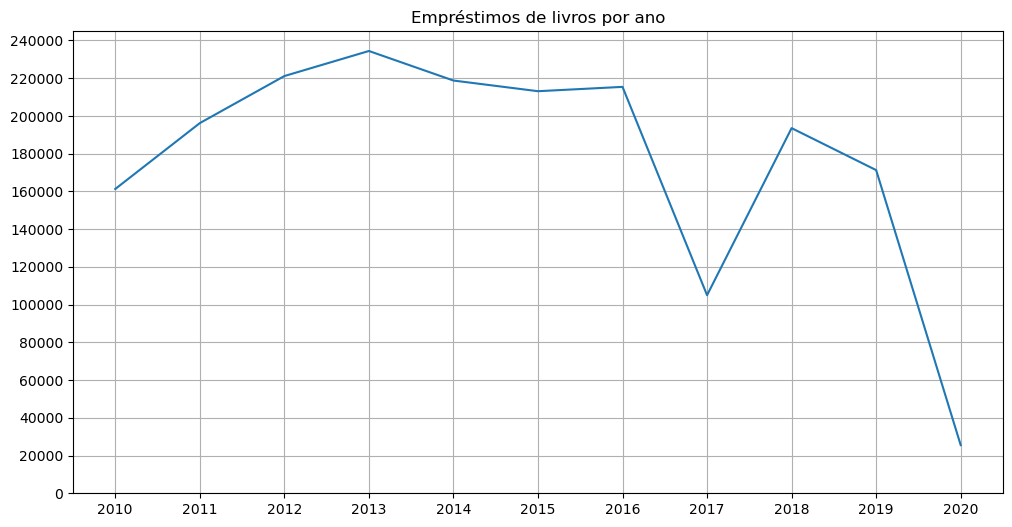

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(grafico_groupby_ano['id_emprestimo'])
ax.set_xticks(grafico_groupby_ano.index)
ax.set_yticks(range(0,max(grafico_groupby_ano['id_emprestimo'])+10000, 20000))
ax.set_title('Empréstimos de livros por ano')
plt.grid(True)
plt.show();

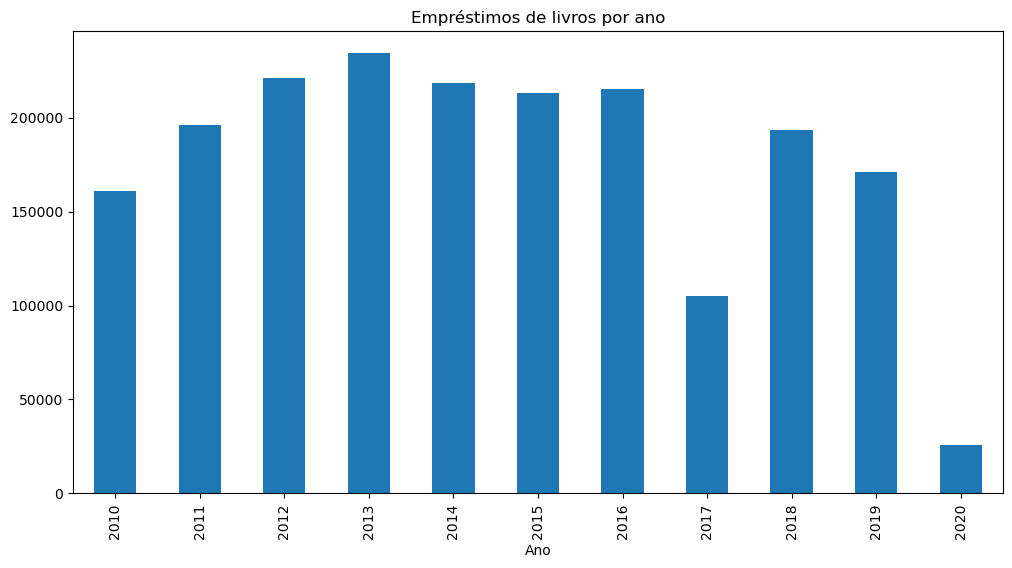

In [33]:
grafico_groupby_ano['id_emprestimo'].plot(title='Empréstimos de livros por ano', figsize=(12,6), xlabel='Ano', kind='bar');

* Pelo gráfico gerado há uma tendência de queda no número de empréstimo de livros da biblioteca.
* Há um evento significativo de redução de empréstimos em 2017. 
* O ano de 2020 pode estar incompleto ou foi impactado pelo fechamento dos cursos presenciais durante a pandemia.

## Gráfico e análise de empréstimo por mês

Gerar uma tabela com a quantidade total de exemplares emprestados por mês e descubra quais meses são os que possuem a maior quantidade de empréstimos realizados. Plote um gráfico de linhas.

In [34]:
df_1['mes_emprestimo'] = df_1['data_emprestimo'].dt.month

In [35]:
grafico_groupby_mes = df_1.groupby(by=["mes_emprestimo"], dropna=False).count()

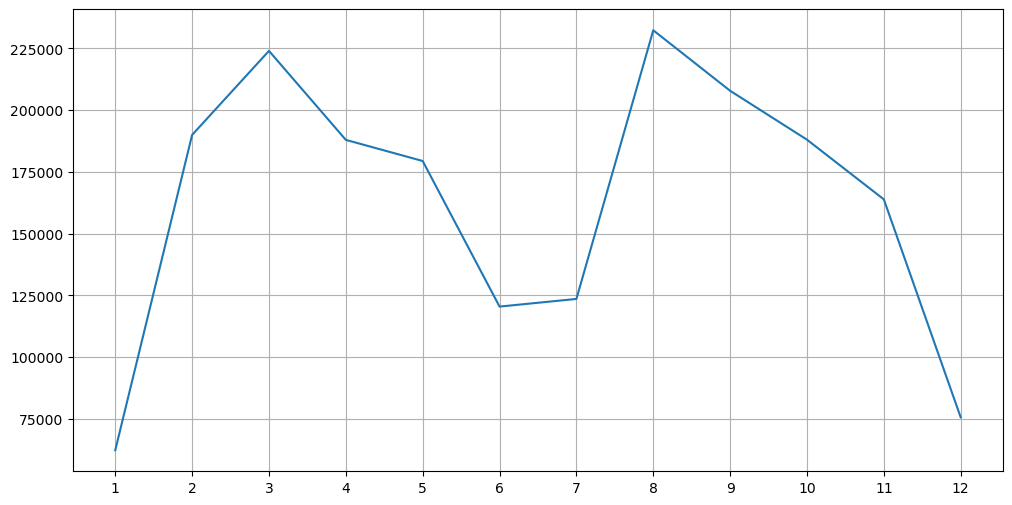

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(grafico_groupby_mes['id_emprestimo'])
ax.set_xticks(grafico_groupby_mes.index)
plt.grid(True)
plt.xticks(rotation = 0)
plt.show()

* Os meses de Janeiro e Dezembro possuem o menor número de empréstimos, seguidos dos meses de junho e julho.
* Esse comportamento certamente está ligado ao período de férias escolares.
* Os meses de Março e Agosto são os meses com maior número de empréstimos.

## Gráfico e análise de empréstimo por hora

Plotar um gráfico de barras e analisar quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário. 

Verificar quais foram os horários com maior quantidade de empréstimos ao longo de um dia inteiro. 

In [37]:
df_1['hora_emprestimo'] = df_1['data_emprestimo'].dt.hour

In [38]:
grafico_groupby_hora = df_1.groupby(by=["hora_emprestimo"], dropna=False).count()
grafico_groupby_hora

,index,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,Classe,ano_emprestimo,mes_emprestimo
hora_emprestimo,,,,,,,,,,,,,,,,
0,17,17,17,2,17,17,17,17,17,17,17,17,17,17,17,17
6,14,14,14,1,14,14,14,14,14,14,14,14,14,14,14,14
7,17585,17585,17585,7176,17585,17547,17585,17585,17585,17585,17585,17585,17585,17585,17585,17585
8,97856,97856,97856,43220,97856,97646,97856,97856,97856,97856,97856,97856,97856,97856,97856,97856
9,124457,124457,124457,53153,124457,124143,124457,124457,124457,124457,124457,124457,124457,124457,124457,124457
10,175657,175657,175657,77047,175657,175086,175657,175657,175657,175657,175657,175657,175657,175657,175657,175657
11,170137,170137,170137,73894,170137,169592,170137,170137,170137,170137,170137,170137,170137,170137,170137,170137
12,140162,140162,140162,63125,140162,139688,140162,140162,140162,140162,140162,140162,140162,140162,140162,140162
13,119637,119637,119637,52888,119637,119192,119637,119637,119637,119637,119637,119637,119637,119637,119637,119637


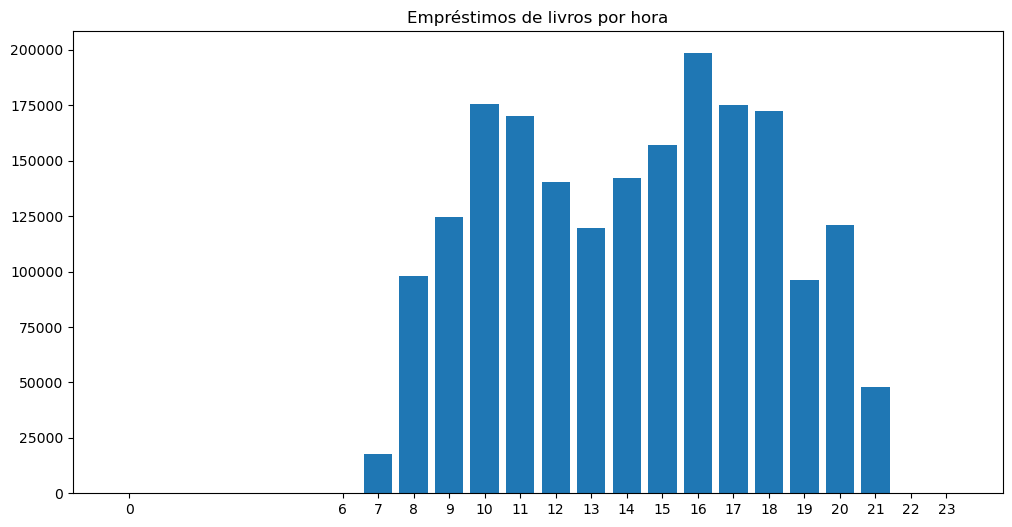

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(grafico_groupby_hora.index, grafico_groupby_hora['id_emprestimo'])
ax.set_xticks(grafico_groupby_hora.index)
ax.set_title('Empréstimos de livros por hora')
plt.show();

* Os melhores horários para alocar as demais atividades, que não seja atendimento a usuários, são antes das 09h, às 19h e às 21h.
* Os horários com maior quantidade de empréstimos foram: entre 10h e 11h e entre 16h e 18h.

### Dúvidas

Verifique a quantidade de empréstimos pelos números de ID. Investigue pela relação deles com o ID dos exemplares. 